# Plot AIMS eReefs map data with Python

## Load the required Python libraries
First of all, load the necessary libraries.

In [1]:
from netCDF4 import Dataset, num2date
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import os
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

## Define which data to be plotted.
In this section we define which data we want to read and plot.

- **inputFile**
  The netCDF input file. This can either be a downloaded file (see [How to manually download derived data from THREDDS](http://ereefs.aims.local/ereefs-aims/help/how-to-manually-download-derived-data)) or a  OPeNDAP URL from the [AIMS THREDDS server](http://thredds.ereefs.aims.gov.au/thredds/catalog.html). For this tutorial we are using the OPeNDAP URL for the file "EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-2010-09.nc".
- **selectedVariable**
  The name of the variable in the netCDF file.
- **selectedTimeIndex**
  The time slice in the netCDF file. Note the index starts with 0. For example, in the netCDF file "EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-2010-09.nc" the time steps are "days". This means if you select `selectedTimeIndex=1` it refers to the second day in this file, which is 02/09/2010.
- **selectedDepthIndex**
  The depth slice in the netCDF file. Note the index starts with 0. See the following table for a mapping of index to value:

| Index (k) | Hydrodynamic 1km model | Hydrodynamic and BioGeoChemical 4km model |
| -: | -: | -: |
| 0 | -140.00 m | -145.00 m |
| 1 | -120.00 m | -120.00 m |
| 2 | -103.00 m | -103.00 m |
| 3 | -88.00 m | -88.00 m |
| 4 | -73.00 m | -73.00 m |
| 5 | -60.00 m | -60.00 m |
| 6 | -49.00 m | -49.00 m |
| 7 | -39.50 m |-39.50 m |
| 8 | -31.00 m | -31.00 m |
| 9 | -24.00 m | -23.75 m |
| 10 | -18.00 m | -17.75 m |
| 11 | -13.00 m | -12.75 m |
| 12 | -9.00 m | -8.80 m |
| 13 | -5.25 m | -5.55 m |
| 14 | -2.35 m | -3.00 m |
| 15 | -0.50 m | -1.50 m |
| 16 | n/a | -0.50 m |

In [2]:
# OPeNDAP URL to file "EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-2010-09.nc". Hydrodynamic 4km model, daily data for the month September 2010
inputFile = "http://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/gbr4_v2/daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-2010-09.nc"
inputFile

'http://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/gbr4_v2/daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-2010-09.nc'

In [3]:
# The "temperature" variable
selectedVariable = "temp"
selectedVariable

'temp'

In [4]:
# 2nd of September 2010. Note the index starts with 0
selectedTimeIndex = 1
selectedTimeIndex

1

In [5]:
# -1.50 m depth. Note the index starts with 0
selectedDepthIndex = 15
selectedDepthIndex

15

## Read in the netCDF file contents
Read in the netCDF file contents and store the latitude, longitude and the variable data for the selected time and depth slice.

In [6]:
nc_data = Dataset(inputFile, 'r')
nc_data.title

'eReefs AIMS-CSIRO GBR4 Hydrodynamic v2 daily aggregation'

In [7]:
lons = nc_data.variables['longitude'][:]
print(lons[0:5]) # look at the first few entries in the longitude vector

[142.168788 142.198788 142.228788 142.258788 142.288788]


In [8]:
lats = nc_data.variables['latitude'][:]
print(lats[0:5]) # look at the first few entries in the latitude vector

[-28.696022 -28.666022 -28.636022 -28.606022 -28.576022]


In [9]:
variableData = nc_data.variables[selectedVariable][selectedTimeIndex, selectedDepthIndex, :, :]
print(variableData[0:5]) # look at the first few entries in the variable data

[[      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ... 19.706053 19.704573 19.697897]
 [      nan       nan       nan ... 19.70424  19.70451  19.699736]
 [      nan       nan       nan ... 19.700645 19.705711 19.70135 ]
 [      nan       nan       nan ... 19.69414  19.70423  19.703842]]


## Plotting
Finally, plot the data.

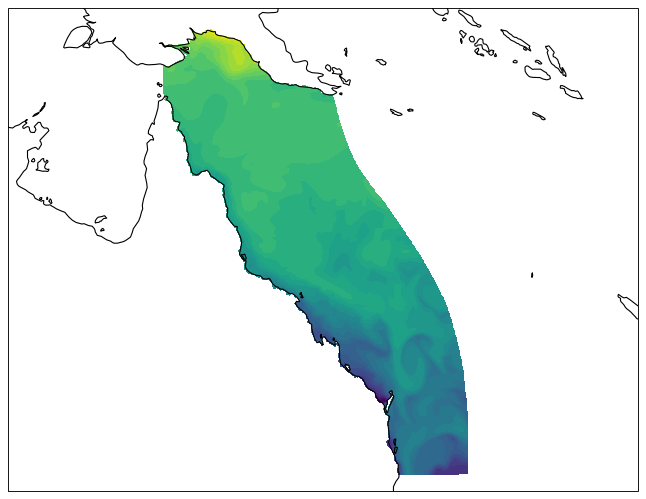

In [10]:
plt.figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([135, 165, -6.5, -29.5], ccrs.PlateCarree())

plt.contourf(lons, lats, variableData, 30, transform=ccrs.PlateCarree())
ax.coastlines()

plt.show()